In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
startup = pd.read_csv("50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# 1.Initial investigation

In [3]:
startup.shape

(50, 5)

In [4]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startup.mean(numeric_only=True)

R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
dtype: float64

In [7]:
startup.std(numeric_only=True)

R&D Spend           45902.256482
Administration      28017.802755
Marketing Spend    122290.310726
Profit              40306.180338
dtype: float64

# 2.Data preparation/Data preprocessing

In [8]:
del startup['State']

In [9]:
startup

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [10]:
x=startup.iloc[:,0:3]
x

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [11]:
y=startup['Profit']
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [43]:
startup=startup.rename({'R&D Spend':'R_D_Spend','Marketing Spend':'Marketing_Spend'},axis=1)

In [44]:
startup

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# 3.Data transformation-Standardscalar

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
stdscaler_model=StandardScaler().fit_transform(x)

In [47]:
scaled_model=pd.DataFrame(stdscaler_model,columns=('R_D_Spend','Administration','Marketing_Spend'))
scaled_model['profit']=y
scaled_model

,R_D_Spend,Administration,Marketing_Spend,profit
0,2.016411,0.560753,2.153943,192261.83
1,1.955860,1.082807,1.923600,191792.06
2,1.754364,-0.728257,1.626528,191050.39
3,1.554784,-0.096365,1.422210,182901.99
4,1.504937,-1.079919,1.281528,166187.94
5,1.279800,-0.776239,1.254210,156991.12
6,1.340066,0.932147,-0.688150,156122.51
7,1.245057,0.871980,0.932186,155752.60
8,1.030369,0.986952,0.830887,152211.77
9,1.091819,-0.456640,0.776107,149759.96


In [48]:
scaled_model.std()

R_D_Spend              1.010153
Administration         1.010153
Marketing_Spend        1.010153
profit             40306.180338
dtype: float64

In [49]:
scaled_model.mean()

R_D_Spend         -7.549517e-17
Administration    -2.564615e-16
Marketing_Spend   -1.554312e-16
profit             1.120126e+05
dtype: float64

# Model building

In [50]:
x_scaled=scaled_model.iloc[:,:3]
y_scaled=scaled_model['profit']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.2)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 3)
(10, 3)
(40,)
(10,)


# Assumption check

In [53]:
scaled_model.corr()

,R_D_Spend,Administration,Marketing_Spend,profit
R_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

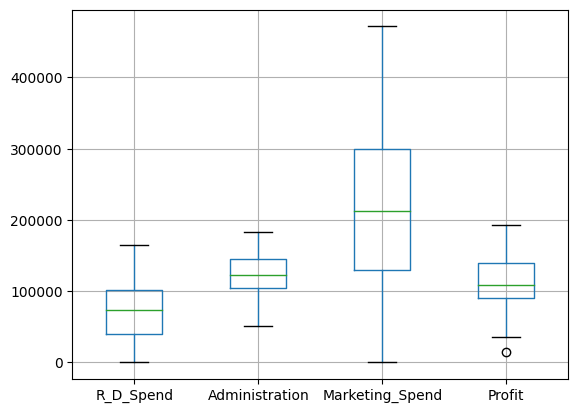

In [54]:
startup.boxplot()

In [55]:
import warnings
warnings.filterwarnings('ignore')

(<AxesSubplot:xlabel='Administration', ylabel='Density'>,
 <AxesSubplot:xlabel='Administration', ylabel='Density'>)

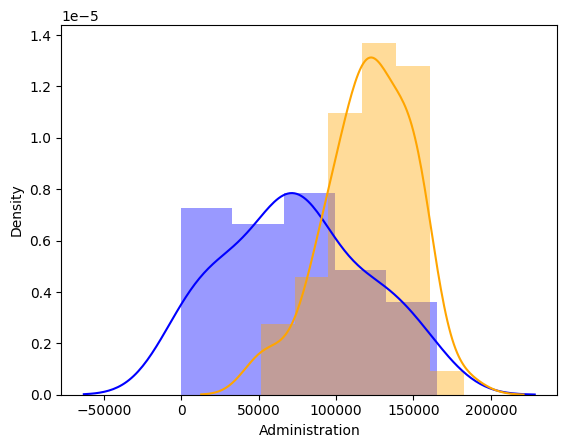

In [56]:
sns.distplot(startup['R_D_Spend'],color='blue'),sns.distplot(startup['Administration'],color='orange')

(<AxesSubplot:xlabel='Profit', ylabel='Density'>,
 <AxesSubplot:xlabel='Profit', ylabel='Density'>)

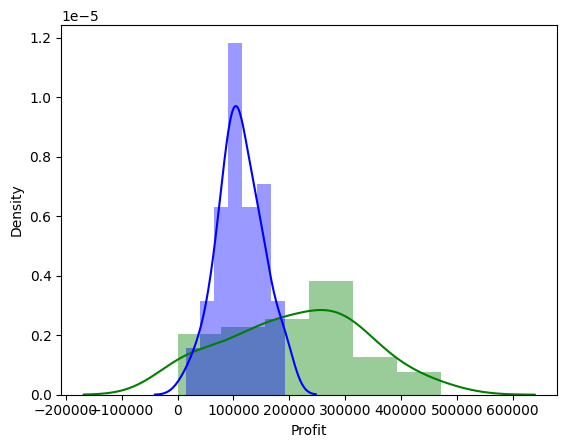

In [57]:
sns.distplot(startup['Marketing_Spend'],color='green'),sns.distplot(startup['Profit'],color='blue')

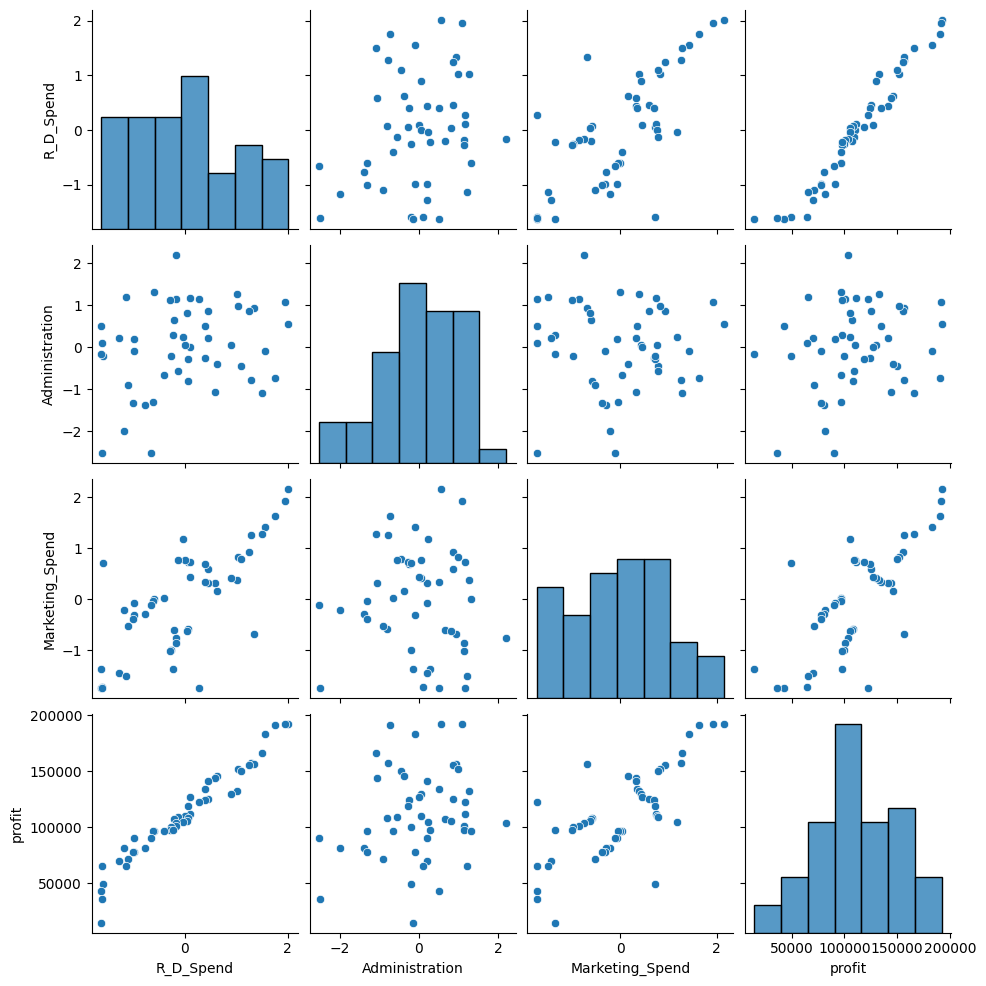

In [58]:
sns.pairplot(scaled_model)

# Model training

In [59]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()

In [60]:
linear_model.fit(x_scaled,y_scaled)

LinearRegression()

# Model testing

In [61]:
y_pred_train=linear_model.predict(x_train)

In [62]:
y_pred_test=linear_model.predict(x_test)

# Model evaluation

In [63]:
from sklearn.metrics import mean_squared_error,r2_score

In [64]:
print('R2 score for train data: ',r2_score(y_train,y_pred_train))
print('R2 score for test data: ',r2_score(y_test,y_pred_test))

R2 score for train data:  0.9496688425672564
R2 score for test data:  0.9541362855699071


# Model optimization

In [65]:
import statsmodels.formula.api as smf

In [66]:
smf.ols('profit ~ R_D_Spend + Administration + Marketing_Spend',data=scaled_model)

In [67]:
methods=(('profit ~ R_D_Spend + Administration + Marketing_Spend'),('profit ~ R_D_Spend + Administration'),
     ('profit ~ R_D_Spend  + Marketing_Spend'),('profit ~ Administration + Marketing_Spend'),
         ('profit ~ R_D_Spend'),('profit ~ Administration'),('profit ~ Marketing_Spend'))

In [71]:
for model in methods:
    models=smf.ols(model,data=scaled_model).fit()
    print(model)
    params=models.params
    print(params)
    pvalue=models.pvalues
    pvalue_data=pvalue.to_frame()
    pvalue_data.reset_index(inplace=True)
    pvalue_data.rename({'index':'features'},axis=1)
    print('')
    print('pvalue is:')
    print(pvalue_data)
    for i in range(len(pvalue_data)):
        if i!=0:
            if pvalue_data.iloc[i,1]>0.05:
                print('')
                print('{} is an insignificant feature, since pvalue {} is more than 0.05'
                  .format(pvalue_data.iloc[i,0],pvalue_data.iloc[i,1]))
    print('')
    print('aic value is: ',models.aic)
    print('rsqaure value is: ',models.rsquared)
    print('_____________________________________________________________________________________________________')

profit ~ R_D_Spend + Administration + Marketing_Spend
Intercept          112012.639200
R_D_Spend           36612.429551
Administration       -743.773321
Marketing_Spend      3296.263048
dtype: float64

pvalue is:
             index             0
0        Intercept  2.053195e-52
1        R_D_Spend  2.634968e-22
2   Administration  6.017551e-01
3  Marketing_Spend  1.047168e-01

Administration is an insignificant feature, since pvalue 0.6017551078497401 is more than 0.05

Marketing_Spend is an insignificant feature, since pvalue 0.1047168192665818 is more than 0.05

aic value is:  1058.7714985998055
rsqaure value is:  0.9507459940683246
_____________________________________________________________________________________________________
profit ~ R_D_Spend + Administration
Intercept         112012.639200
R_D_Spend          39175.430231
Administration     -1469.892410
dtype: float64

pvalue is:
            index             0
0       Intercept  6.180876e-53
1       R_D_Spend  2.278348e-31
2

# Calculating varience influence factor

In [70]:
reg_rd=smf.ols('R_D_Spend ~ Administration + Marketing_Spend',data=scaled_model).fit().rsquared
vif_rd=1/(1-reg_rd)

reg_ad=smf.ols('Administration ~ R_D_Spend + Marketing_Spend',data=scaled_model).fit().rsquared
vif_ad=1/(1-reg_ad)

reg_ms=smf.ols('Marketing_Spend ~ R_D_Spend + Administration ',data=scaled_model).fit().rsquared
vif_ms=1/(1-reg_ms)

In [72]:
vif_table=pd.DataFrame({'feature':['R_D_Spend','Administration','Marketing_Spend'],'VIF':[vif_rd,vif_ad,vif_ms]})
vif_table

,feature,VIF
0,R_D_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


# Residual analysis

## Test for Normality of Residuals (Q-Q Plot)

In [73]:
modelqq=smf.ols('profit ~ R_D_Spend + Administration + Marketing_Spend',data=scaled_model).fit()

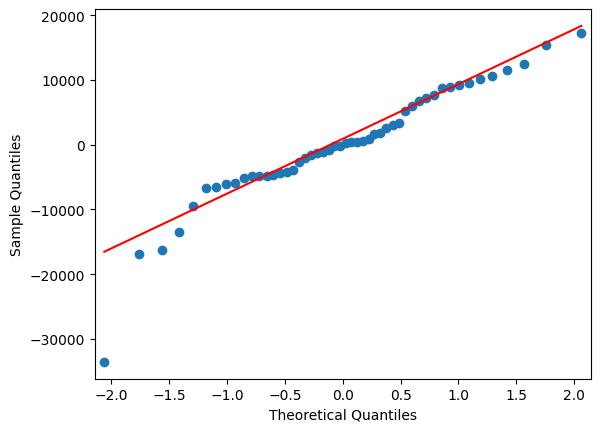

In [74]:
import statsmodels.api as sm
qqplot=sm.qqplot(modelqq.resid,line='q')

In [75]:
list(np.where(modelqq.resid<-15000))

[array([14, 15, 49], dtype=int64)]

## Residual Plot for Homoscedasticity

In [76]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

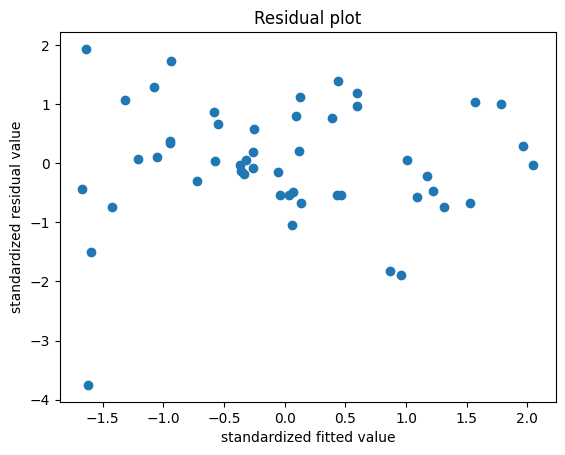

In [77]:
plt.scatter(get_standardized_values(modelqq.fittedvalues),get_standardized_values(modelqq.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted value')
plt.ylabel('standardized residual value')
plt.show()

# Residual VS Regressor

R_D_Spend
eval_env: 1


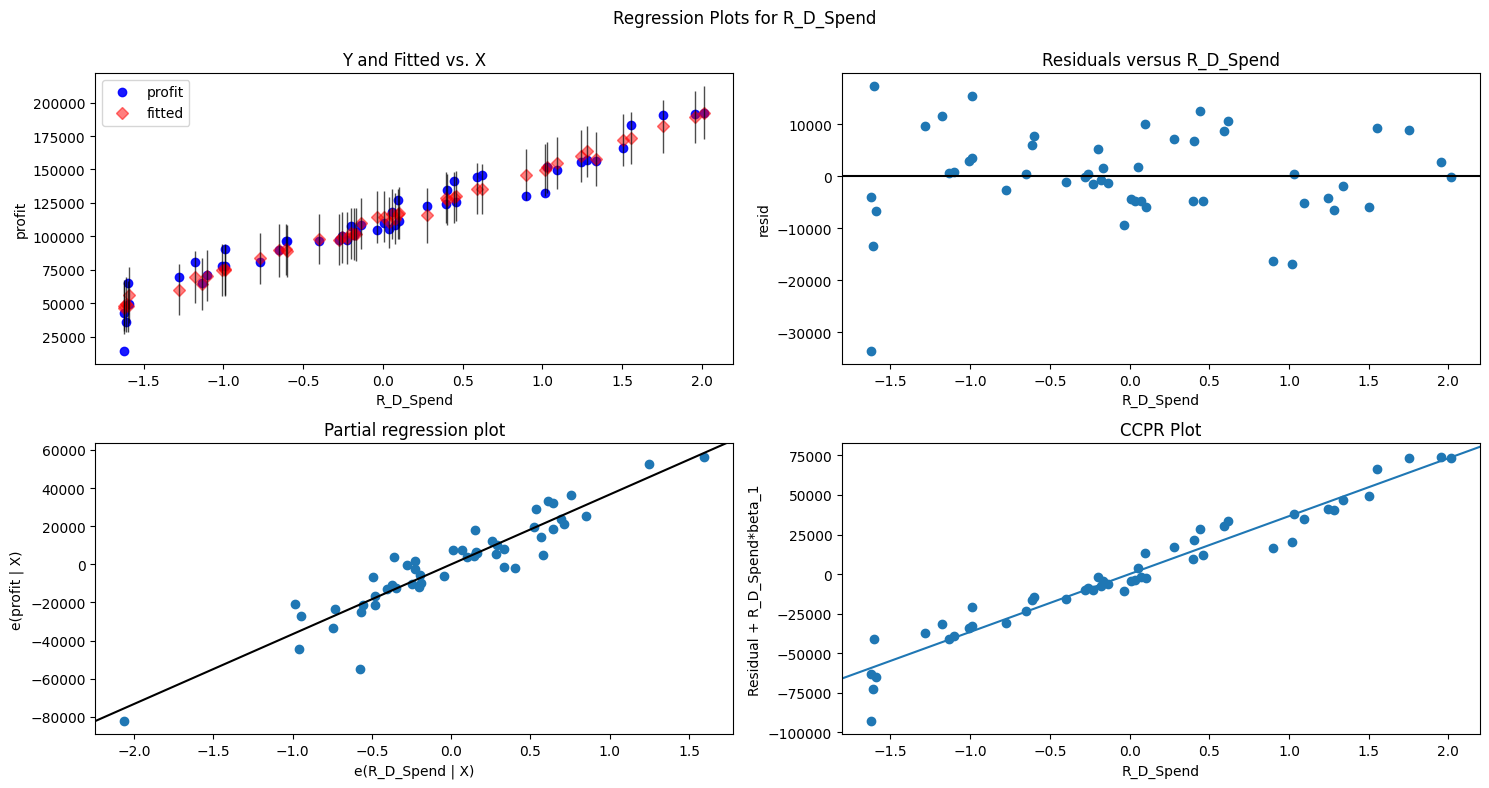

Administration
eval_env: 1


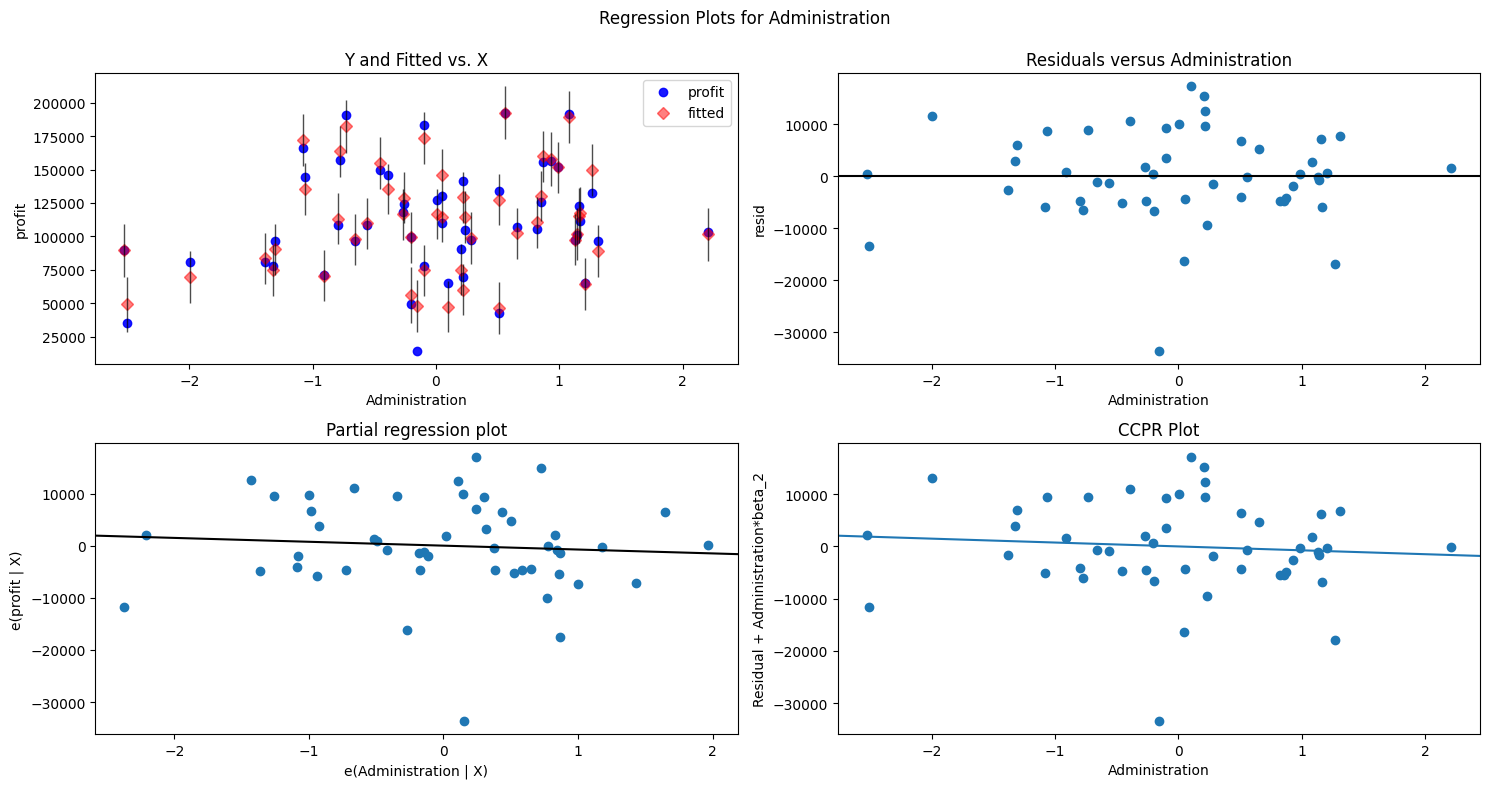

Marketing_Spend
eval_env: 1


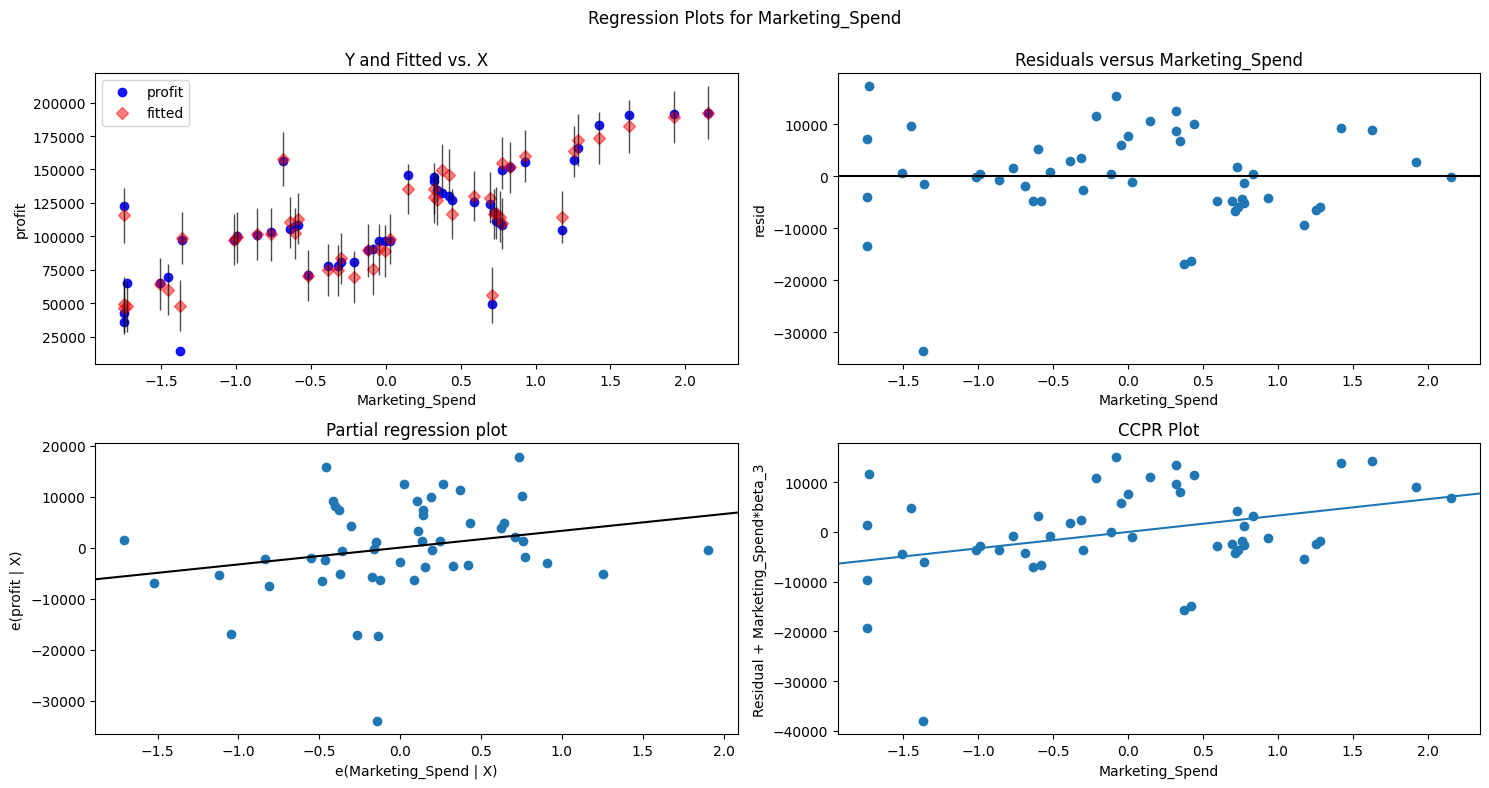

In [79]:
graphics=['R_D_Spend','Administration','Marketing_Spend']
for i in graphics:
    print(i)
    fig=plt.figure(figsize=(15,8))
    fig=sm.graphics.plot_regress_exog(modelqq,i,fig=fig)
    plt.show()

# Model Deletion Diagnostics

## Detecting influencers/outliers

In [82]:
model_influence=modelqq.get_influence()
c,_=model_influence.cooks_distance

<StemContainer object of 3 artists>

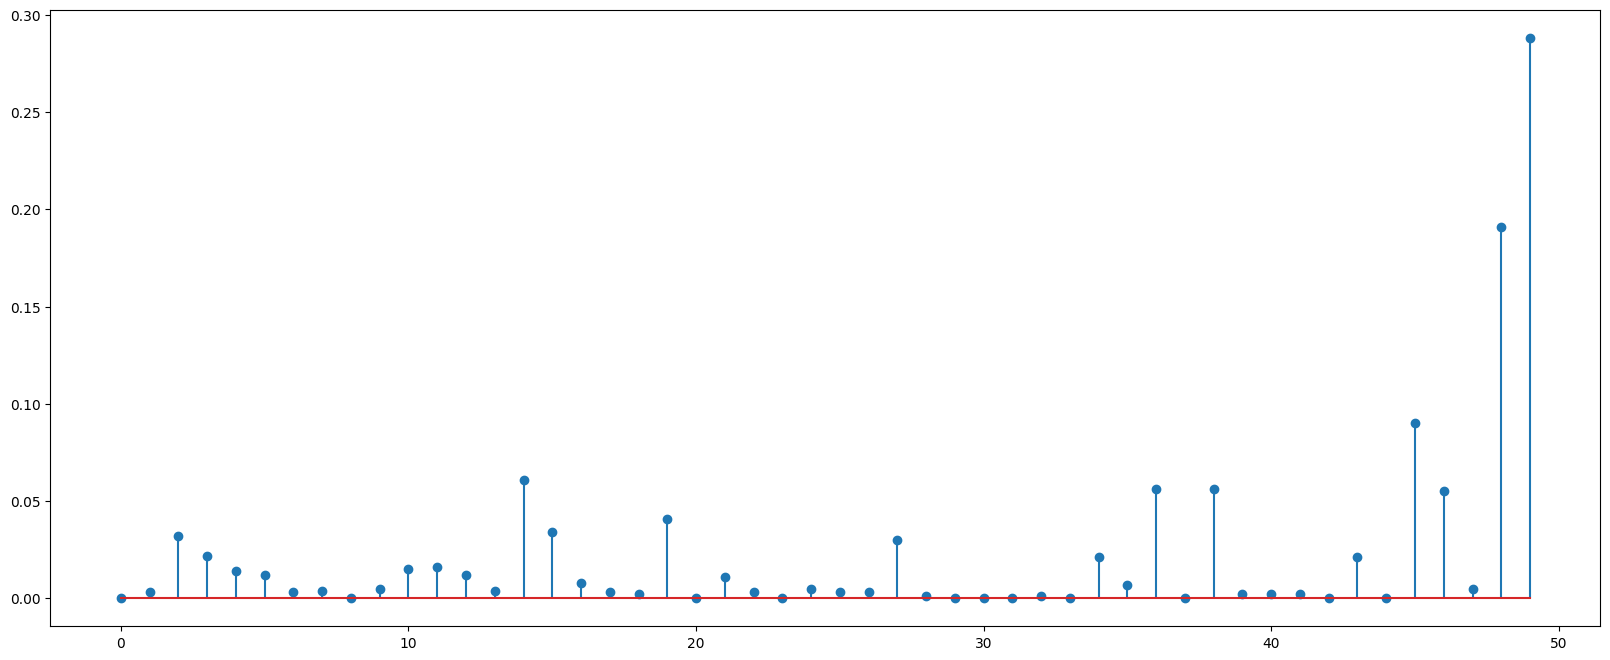

In [84]:
fig_cook=plt.figure(figsize=(20,8))
plt.stem(np.arange(len(startup)),np.round(c,3))

In [85]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432684)

## High influence point

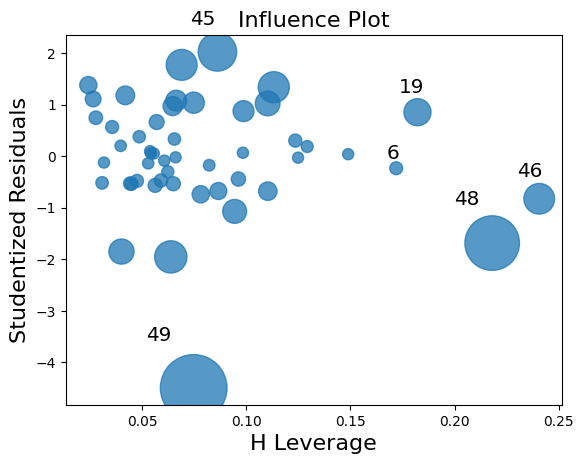

In [86]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(modelqq)
plt.show()

In [88]:
k=startup.shape[1]
n=startup.shape[0]
leverage_cutoff=3*((k +1)/n)
leverage_cutoff

0.30000000000000004

# Model optimization

In [90]:
startups_data_new=startup
startups_data_new

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [91]:
startups_data_new=startups_data_new.drop(startups_data_new.index[49])
startups_data_new=startups_data_new.drop(startups_data_new.index[48])
startups_data_new=startups_data_new.drop(startups_data_new.index[46])
startups_data_new=startups_data_new.drop(startups_data_new.index[14]).reset_index()

In [92]:
startups_data_new.shape,scaled_model.shape

((46, 5), (50, 4))

# Final model

In [93]:
model_final=smf.ols('profit ~ R_D_Spend + Administration + Marketing_Spend',data=scaled_model).fit()

In [94]:
model_final.rsquared,model_final.aic

(0.9507459940683246, 1058.7714985998055)

In [95]:
model_final_ad=smf.ols('profit ~ R_D_Spend + Marketing_Spend',data=scaled_model).fit()

In [96]:
model_final_ad.rsquared,model_final_ad.aic

(0.9504503015559763, 1057.070772191826)